In [1]:
from PIL import Image, ImageDraw
import string
import random
import os
from pdf2image import convert_from_path 
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from fpdf import FPDF
import pytesseract
import bezier


In [2]:
def make_shadow(image):
    n = np.random.randint(2, 6)
    shadow = np.zeros((image.size[1], image.size[0]))
    
    pointsx = image.size[0]*np.random.random(n)
    pointsy = image.size[1]*np.random.random(n)
    
    shadow[(pointsy).astype(np.int), (pointsx).astype(np.int)] = 1
    shadow = ndimage.gaussian_filter(shadow, sigma=image.size[0] / (2 * n))
    
    image_arr = np.array(image.convert('LA'))[:, :, 0]
    image_arr = np.where(image_arr > 200, 255, 0)
    image_arr = np.where(image_arr == 255, image_arr - (shadow - np.min(shadow)) * 200 / np.max(shadow), image_arr)

    return Image.fromarray(np.uint8(image_arr))

In [3]:
def make_bezier_shadow(image):
    shadow = np.zeros((image.size[1], image.size[0]))
    n_curves = np.random.randint(2, 4)
    
    for i in range(n_curves):
        n_dots = np.random.randint(5, 9)
        
        pointsx = image.size[0]*np.random.random(n_dots)
        pointsy = image.size[1]*np.random.random(n_dots)
        
        curve1 = bezier.Curve(np.asfortranarray([pointsx, pointsy]), degree=n_dots-1)

        shadow_points = curve1.evaluate_multi(np.linspace(0.0, 1.0, 100))
        shadow[(shadow_points[1]).astype(int), (shadow_points[0]).astype(int)] = 1
    
    s = np.random.uniform(0.5, 0.9)
    shadow = ndimage.gaussian_filter(shadow, sigma=image.size[0] / (s * n_dots)).T
        
    darkness =  np.random.uniform(0.7, 0.85)
    shadow = 1 - darkness * (shadow - np.min(shadow)) / np.max(shadow)
    
    mask = np.where(shadow > 0.85, 0, 255)

    pixels = image.load()
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            pixels[x, y] =  (int(pixels[x, y][0] * shadow[x, y]),
                             int(pixels[x, y][1] * shadow[x, y]),
                             int(pixels[x, y][2] * shadow[x, y]))
                        
    return image, Image.fromarray(np.uint8(mask.T))
    

In [23]:

def make_samples(out_dir='', n_samples=100, inf=None):

    if len(out_dir) == 0:
        out_dir = os.getcwd()
    os.chdir(out_dir)
    
    try:
        os.mkdir('img')
    except:
        pass
    try:
        os.mkdir('gr')
    except:
        pass
    try:
        os.mkdir('mask')
    except:
        pass
    try:
        os.mkdir('txt')
    except:
        pass
    
    aligns = ['L', 'C', 'R']
    fonts = ['Courier', 'Arial', 'Times']
    styles = ['', 'B', 'I']
    
    for i in range(n_samples):
        pdf = FPDF() 
        pdf.add_page()
        
        font = random.choice(fonts)
    
        target = ''
        
        lines = random.randint(20, 30)
        for _ in range(lines):
            
            fontsize = random.randint(15,20)
            pdf.set_font(font, size=fontsize, style=random.choice(styles)) 
            r = random.randint(0, 30)
            g = random.randint(0, 30)
            b = random.randint(0, 30)

            pdf.set_text_color(r, g, b)

            str_size = random.randint(20,40)
    

            
            randomstr = ''.join(random.choices(string.ascii_letters+string.digits + ' ' * 20, k=str_size))
            target += randomstr + '\n'
        
            pdf.cell(w=0, h=10, txt=randomstr, ln=1, align=random.choice(aligns)) 
        
        pdf.output('temp1.pdf')    
        image = convert_from_path('temp1.pdf', poppler_path=r'/usr/local/Cellar/poppler/21.04.0/bin')[0]
        image = image.resize((680, int(image.size[1] * 680 / image.size[0])))
        
        image_path = 'gr/' + str(i)+ '.jpg'
        image.save(image_path, 'JPEG')


        image, mask = make_bezier_shadow(image)
        
        mask_path = 'mask/' + str(i)+ '.jpg'
        mask.save(mask_path, 'JPEG')
        
        image_path = 'img/' + str(i)+ '.jpg'
        image.save(image_path, 'JPEG')
        
        target_path = 'txt/' + str(i)+ '.txt'
        text_file = open(target_path, "w")
        text_file.write(target)
        text_file.close()
        
        if inf is not None and i % 10 == 0:
            print('progress {:0.2f}'.format(i * 100/ n_samples), '%')
    
    os.remove('temp1.pdf')

In [39]:
make_samples(n_samples=1, inf=1)

progress 0.00 %


In [81]:
import Levenshtein

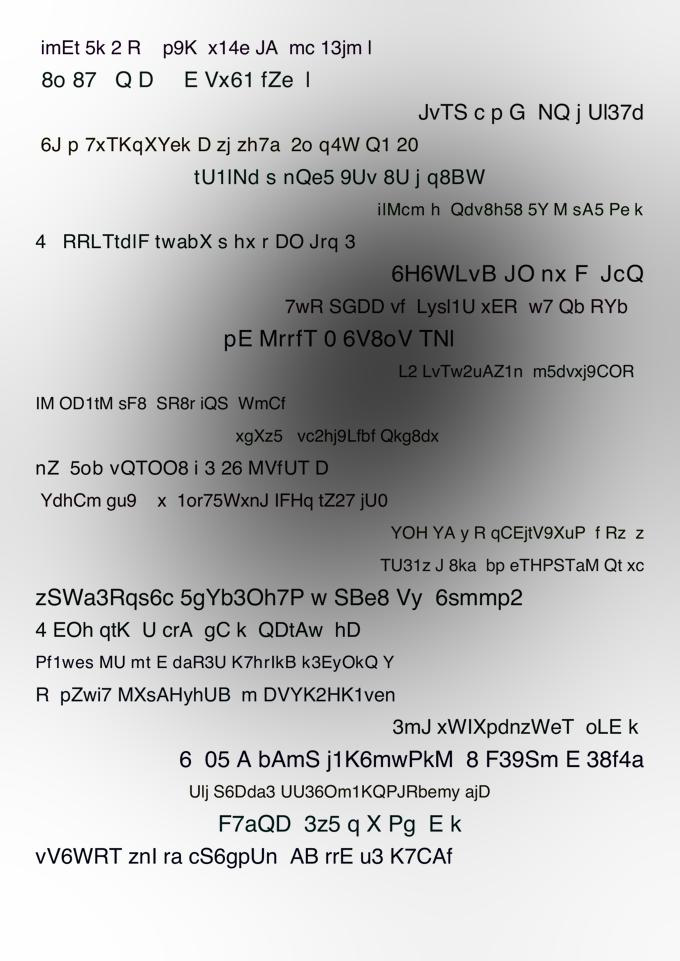

In [40]:
Image.open('img/0.jpg')

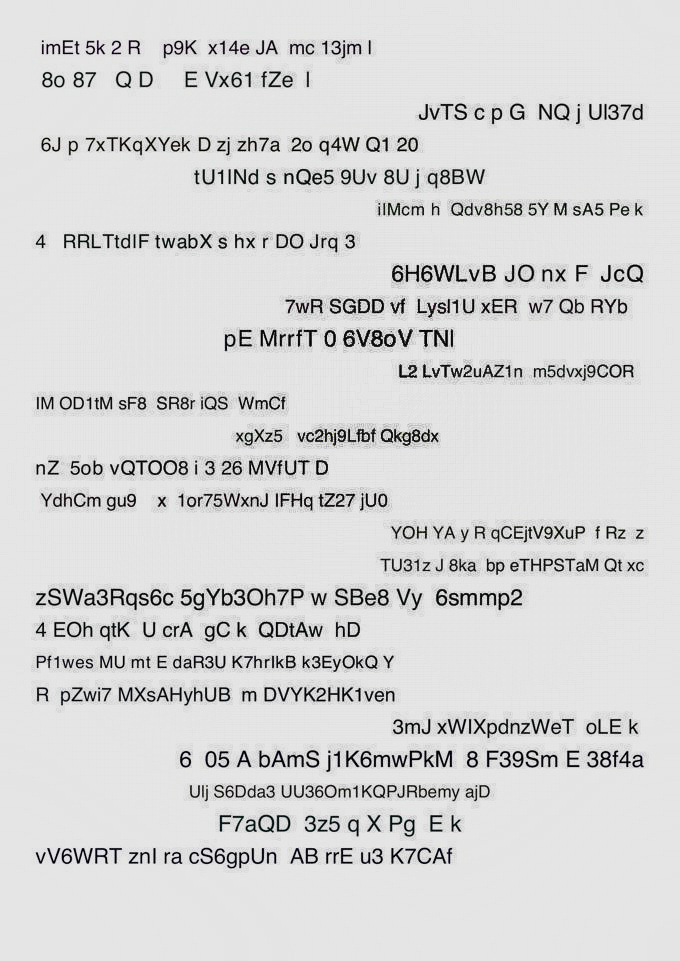

In [43]:
Image.open('res/0.jpg')

In [44]:
import re
img = re.sub('\n+', '\n', pytesseract.pytesseract.image_to_string(Image.open('img/0.jpg')))
img = re.sub('\n ', '', img)
print(s)

IM6 O jS vbyL B2SelOltd G mFy Qa
4qyPBvv IAr TYa LE2 5JJz58F 2tg
jxaKrBs bL 2sv cK N2Vvf
jS2 C3WK61Vm1 P vQWA 9w8z1      
Y 13223NHb f1b G 0
D
UJ Z Qup DhJM
B1l
TwbaD fAxpA 6D wEw
qz8 3j X5HF w
E KtI9P Cl2d G6QIsxNnHT o D
n 1u3koPS3HXOEV eUZKJT i BV TjoVK
UMQ1lh KnL kMbKr43N2 n Mh pUEVTIGz



In [45]:
import re
clear = re.sub('\n+', '\n', pytesseract.pytesseract.image_to_string(Image.open('gr/0.jpg')))
clear = re.sub('\n ', '', clear)
print(clear)

imEt5k2R p9K x14e JA mc 13jm|
8087 QD EVx61fZe |
JTScpG NQjUIB7d
6J p 7xTKqXYek D zj zh7a 20 q4W Q1 20
tU1INd s nQe5 9Uv 8U j q8BW
ilMcm h Qdv8h58 5Y M sA5 Pe k
4 RRLTtdIF twabX s hx r DO Jrq 3
6HBWLVB JO nx F JcQ
7wR SGDD vf Lysl1U xER w7 Qb RYb
pE MrrfT 0 6V8oV TNI
L2 LvTw2uAZ1n m5dvxj9COR
IM OD1tM sF8 SR8riQS WmCf
xgXz5 ve2hj9Lfbf Qkg8dx
nZ 50b vQTOO8 i 3 26 MVIUT D
YdhCmgu9 x 1or75Wxnd IFHq tZ27 juo
YOH YAy R qCEjtVOXuP fRz z
TU31z J 8ka bp eTHPSTaM Qt xc
zSWa3Rqs6éc 5gYb30h7P w SBe8 Vy 6smmp2
4 EOh gtk UcrA gCk QDtAw hD
Piiwes MU mt E daR3U K7hrlkB k3EyOkQ Y
R pZwi7 MXsAHyhUB m DVYK2HK1ven
3mJ xWIXpdnzWeT oLE k
6 05 A bAmS jiKémwPkM 8 F39Sm E 38f4a
Ulj S6Dda3 UU360m1KQPJRbemy ajD
F7aQD 3259 X Pg Ek
VVBWRT znl ra cS6gpUn AB rrE u3 K7CAf



In [46]:
res = re.sub('\n+', '\n', pytesseract.pytesseract.image_to_string(Image.open('res/0.jpg')))
res = re.sub('\n ', '', res)
print(res)

imEt5k2R p9K x14e JA mc 13jm|
8087 QD EVx61fZe |
JTScpG NQjUIB7d
6J p 7xTKqXYek D zj zh7a 20 q4W Q1 20
tU1INd s nQe5 9Uv 8U j q8BW
ilMcm h Qdv8h58 5Y M sA5 Pe k
4 RRLTtdIF twabX s hx r DO Jrq 3
6HEWLVB JO nx F JcQ
7wR SGDD vf Lysl1U xER w7 Qb RYb
pE MrrfT 0 6V8oV TNI
L2 LvTw2uAZin m5dvxj9COR
IM OD1tM sF8 SReriQs WmCt
xgXz5 ve2higLfbf QkgBdx
nZ 50b vQTOO8 i 3 26 MVIUT D
YdhCmgud x 1or75Wxnd IFHg tZ27 ju0
YOH YAy R qCEjtVOXuP Rz z
TU31z J 8ka bp eTHPSTaM Qt xc
zSWa3Rqs6c 5gYb30h7P w SBe8 Vy 6smmp2
4 EOh gtk UcrA gCk QDtAw hD
Pfiwes MU mt E daR3U K7hrlkB k3EyOkQ Y
R pZwi7 MXsAHyhUB m DVYK2HK1ven
3mJ xWIXpdnzWeT oLE k
6 05 A bAmS jiIKémwPkM 8 F39Sm E 38f4a
Ulj S6Dda3 UU360m1KQPJRbemy ajD
F7aQD 3259 X Pg Ek
VVBWRT znl ra cS6gpUn AB rrE u3 K7CAf



In [47]:
truth = ''
f = open("txt/0.txt")
gr = ''.join(f.readlines())
gr = re.sub('  ', ' ', gr)
gr = re.sub('  ', ' ', gr)


print(gr)

 imEt 5k 2 R p9K x14e JA mc 13jm l
 8o 87 Q D  E Vx61 fZe l
 JvTS c p G NQ j Ul37d
 6J p 7xTKqXYek D zj zh7a 2o q4W Q1 20
tU1lNd s nQe5 9Uv 8U j q8BW
ilMcm h Qdv8h58 5Y M sA5 Pe k
4 RRLTtdlF twabX s hx r DO Jrq 3 
6H6WLvB JO nx F JcQ
7wR SGDD vf Lysl1U xER w7 Qb RYb 
 pE MrrfT 0 6V8oV TNl 
L2 LvTw2uAZ1n m5dvxj9COR 
IM OD1tM sF8 SR8r iQS WmCf 
xgXz5 vc2hj9Lfbf Qkg8dx 
nZ 5ob vQTOO8 i 3 26 MVfUT D
 YdhCm gu9 x 1or75WxnJ IFHq tZ27 jU0
YOH YA y R qCEjtV9XuP f Rz z
TU31z J 8ka bp eTHPSTaM Qt xc
zSWa3Rqs6c 5gYb3Oh7P w SBe8 Vy 6smmp2
4 EOh qtK U crA gC k QDtAw hD
Pf1wes MU mt E daR3U K7hrIkB k3EyOkQ Y
R pZwi7 MXsAHyhUB m DVYK2HK1ven
3mJ xWIXpdnzWeT oLE k 
6 05 A bAmS j1K6mwPkM 8 F39Sm E 38f4a
Ulj S6Dda3 UU36Om1KQPJRbemy ajD
F7aQD 3z5 q X Pg E k
vV6WRT znI ra cS6gpUn AB rrE u3 K7CAf 
8Dz QRhyf2 Y Hq i4 206tjQ9YWrl
Qs40 D4 xQPq 5G2K IgmM9 E9PzMU tjpONP 
8UoC eO4y8Xg b k61CMH OUkl xWg Q T



In [48]:
import Levenshtein
Levenshtein.distance(clear, img)

328

In [49]:
Levenshtein.distance(clear, res)

15

In [50]:
Levenshtein.distance(clear, gr)

175

In [38]:
Levenshtein.distance(gr, res)

53